In [1]:
from google.colab import files
# upload an image to work on
def upload_files():
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())


files = upload_files()

# just consider the first file = 1st image
image = files[0]

Saving 2018-05-31 19.51.28 1791547183546031355_foxglove.jpg to 2018-05-31 19.51.28 1791547183546031355_foxglove.jpg


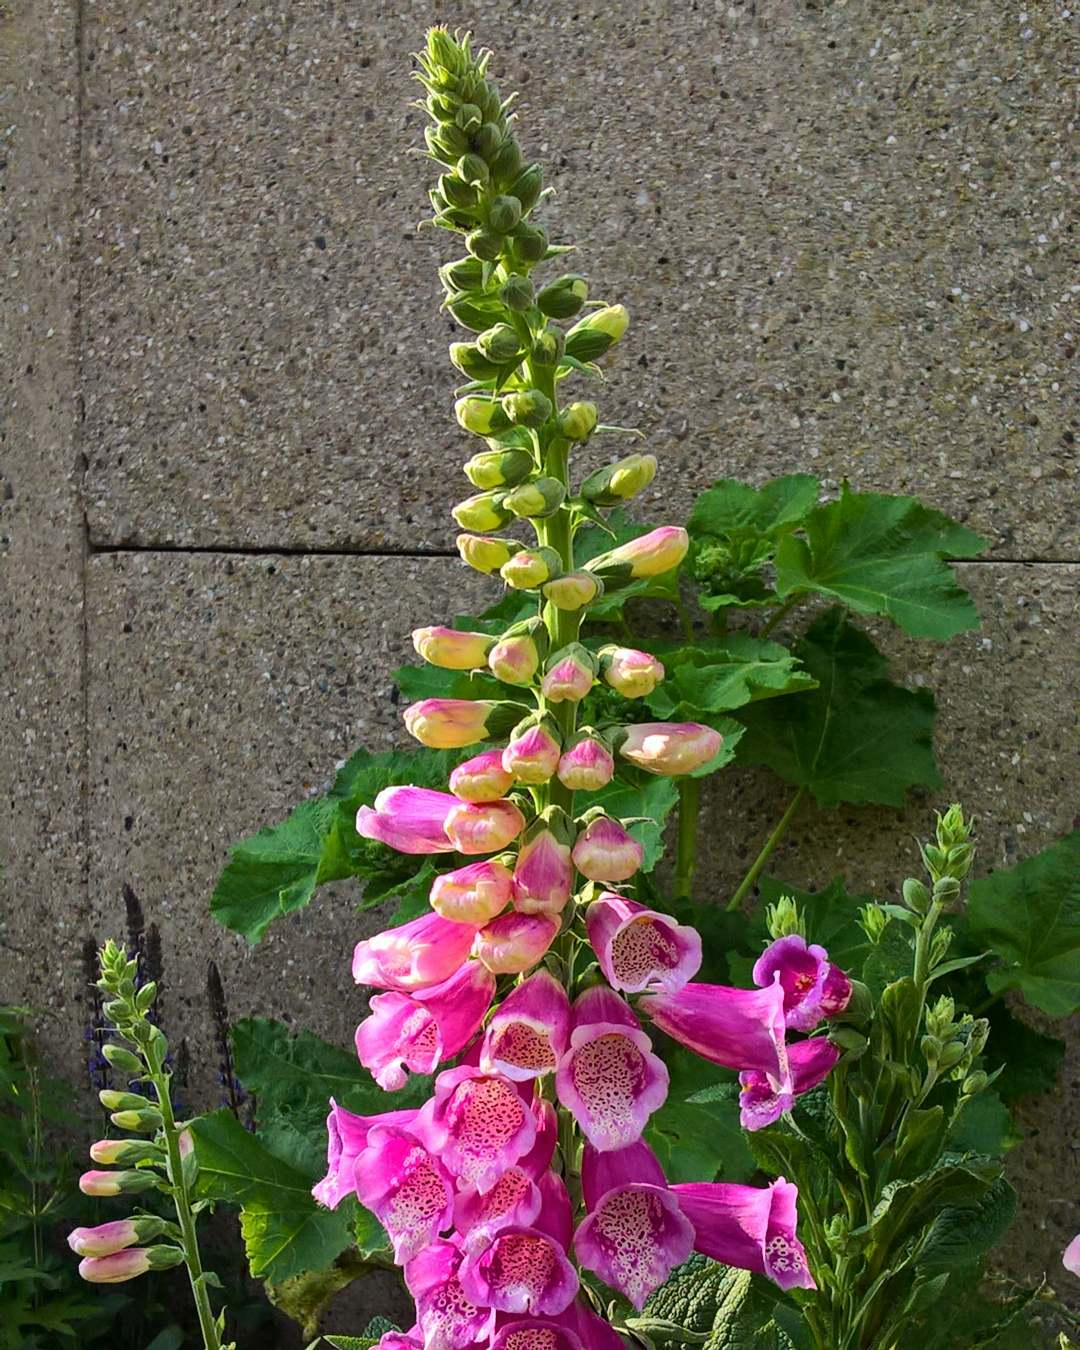

In [2]:
from IPython.display import Image, display
import PIL.Image

# show uploaded image
display(Image(image))

# open the image with PIL or pillow to optimize it with numpy
imagePil = PIL.Image.open(image)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



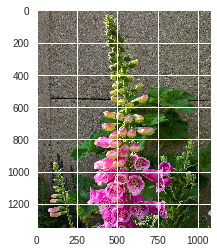

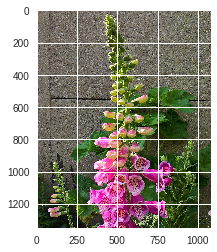

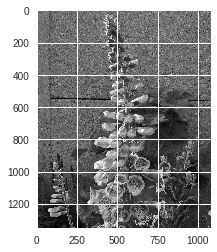

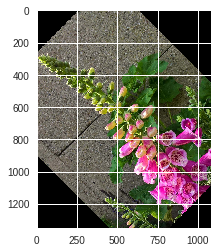

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import io
from matplotlib.pyplot import imshow
# randomize image turning it or changing colors, intensity ecc

# grayscale
imgGrey = imagePil.convert('LA')

# image enchancing
from PIL import ImageEnhance
enhancer = ImageEnhance.Sharpness(imagePil)


# rotate image
img45 = imagePil.rotate(45)
img90 = imagePil.rotate(90)
imgl45 = imagePil.rotate(-45)


# convert image to base64 format
def encode_img(img_fn):
  import base64
  in_mem_file = io.BytesIO()
  img_fn.save(in_mem_file, format = "PNG")
  # reset file pointer to start
  in_mem_file.seek(0)
  img_bytes = in_mem_file.read()

  base64_encoded_result_bytes = base64.b64encode(img_bytes)
  base64_encoded_result_str = base64_encoded_result_bytes.decode('ascii')
  return base64_encoded_result_str
  
# print base image format base64
print(encode_img(imagePil))

# display the other images
plt.figure()
plt.imshow(imagePil) # original

plt.figure()
plt.imshow(enhancer.enhance(2.0)) # enhanced


plt.figure()
plt.imshow(imgGrey) # grayscale

plt.figure()
plt.imshow(img45) # rotated